In [1]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import cm
import tensorflow as tf
import random

In [2]:
from typing import List, Tuple, TypedDict

In [7]:
def create_codeword(letters: List[float], codeword_size = 10) -> List[float]:
    return [random.choice(letters) for _ in range(codeword_size)]

In [8]:
def create_input_codeword(codeword: List[float], alpha_value: float) -> List[float]:
    return list(alpha_value * np.array(codeword))

In [9]:
def create_random_codeword(codeword_size = 10, alpha_value: float = 0.7) -> List[float]:
    a = 1
    minus_a = -1
    base_codeword = create_codeword(letters=[a, minus_a], codeword_size=codeword_size)
    return create_input_codeword(codeword=base_codeword, alpha_value=alpha_value)

In [10]:
class CodewordProbabilities(TypedDict):
    prob_a: float
    prob_minus_a: float

In [11]:
class PhotodetectorProbabilities(TypedDict):
    prob_click: List[float]
    prob_no_click: List[float]

In [12]:
def compute_a_minus_a_probabilities(codeword: List[float], alpha_value: float) -> CodewordProbabilities:
    # prob_a should be 0.5 with larger codewords
    prob_a = codeword.count(alpha_value)/len(codeword)
    return {
        'prob_a': prob_a,
        'prob_minus_a': 1 - prob_a
    }

In [13]:
def compute_photodetector_probabilities(codeword_size: int) -> PhotodetectorProbabilities:
    # either will be the results.state.fock_prob([0]) 
    # or sampling n_shots time the sample[0][0]
    prob_no_click = [np.round(random.randrange(0,100,1)/100, 2) for _ in range(codeword_size)]
    return {
        'prob_click': list(1 - np.array(prob_no_click)),
        'prob_no_click': prob_no_click
    }
    

In [14]:
def compute_error_probability(codeword: List[float],
                              codeword_prob: CodewordProbabilities,
                              photodetector_prob: PhotodetectorProbabilities) -> float:

    p_errors = [(codeword_prob['prob_a'] * photodetector_prob['prob_click'][codeword_index] + 
                codeword_prob['prob_minus_a'] * photodetector_prob['prob_no_click'][codeword_index])
                for codeword_index, _ in enumerate(codeword)]

    return sum(p_errors)/len(codeword)

In [15]:
def create_codeword_and_compute_average_error_probability(codeword_size = 10, alpha_value = 0.7) -> float:
    codeword = create_random_codeword(codeword_size, alpha_value)
    codeword_probabilities = compute_a_minus_a_probabilities(codeword, alpha_value)
    print(codeword_probabilities)
    photodetector_probabilities = compute_photodetector_probabilities(codeword_size)
    
    return compute_error_probability(codeword=codeword,
                                                  codeword_prob=codeword_probabilities,
                                                  photodetector_prob=photodetector_probabilities)

In [16]:
create_codeword_and_compute_average_error_probability(codeword_size=1000, alpha_value=0.7)

{'prob_a': 0.492, 'prob_minus_a': 0.508}


0.4997091200000012

In [17]:
alpha_values = np.arange(0.4, 1.4, 0.1)

In [18]:
[create_codeword_and_compute_average_error_probability(codeword_size=100000, alpha_value=alpha_value) for alpha_value in alpha_values]

{'prob_a': 0.5009, 'prob_minus_a': 0.4991}
{'prob_a': 0.50199, 'prob_minus_a': 0.49800999999999995}
{'prob_a': 0.49882, 'prob_minus_a': 0.50118}
{'prob_a': 0.50176, 'prob_minus_a': 0.49824}
{'prob_a': 0.50067, 'prob_minus_a': 0.49933000000000005}
{'prob_a': 0.4996, 'prob_minus_a': 0.5004}
{'prob_a': 0.50194, 'prob_minus_a': 0.49805999999999995}
{'prob_a': 0.50002, 'prob_minus_a': 0.49998}
{'prob_a': 0.49945, 'prob_minus_a': 0.50055}
{'prob_a': 0.49956, 'prob_minus_a': 0.50044}


[0.5000105910199977,
 0.5000189018159905,
 0.49998982132001,
 0.5000159878399951,
 0.5000082372480106,
 0.4999955752800068,
 0.5000237335720052,
 0.5000002040759958,
 0.4999934015400122,
 0.499995593751989]

In [64]:
prob_x = [np.round(random.randrange(0,100,1)/100, 2) for _ in range(10)]

In [66]:
prob_y = list(1 - np.array(prob_x))

In [73]:
[x+prob_y[i] for i,x in enumerate(prob_x)]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [69]:
prob_x

[0.67, 0.48, 0.29, 0.71, 0.75, 0.94, 0.34, 0.03, 0.81, 0.95]

In [70]:
prob_y

[0.32999999999999996,
 0.52,
 0.71,
 0.29000000000000004,
 0.25,
 0.06000000000000005,
 0.6599999999999999,
 0.97,
 0.18999999999999995,
 0.050000000000000044]

In [11]:
prog = sf.Program(1)

In [12]:
with prog.context as q:
    Vac | q[0]

eng = sf.Engine('gaussian')
state = eng.run(prog).state

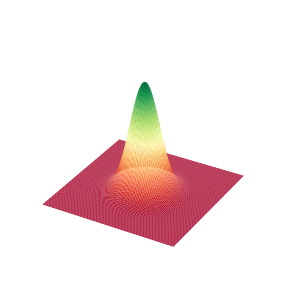

In [4]:
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

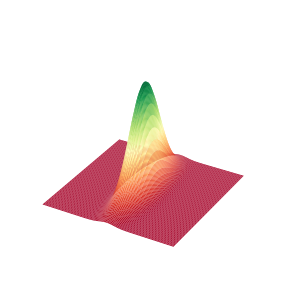

In [24]:
eng.reset()
prog2 = sf.Program(1)
with prog2.context as q:
    S = Sgate(0.6)
    S | q[0]


state = eng.run(prog2).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(4.8, 5)
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.set_axis_off()

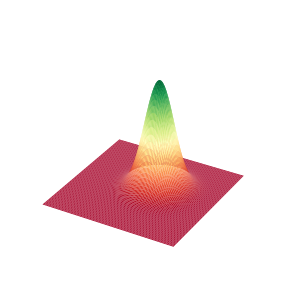

In [31]:
eng.reset()
prog = sf.Program(1)
with prog.context as q:
    Dgate(0.5) | q[0]
    Rgate(np.pi/4) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

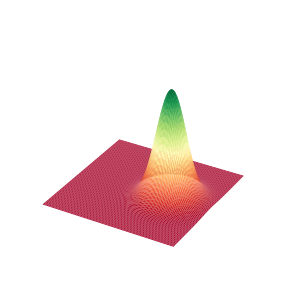

In [38]:
eng.reset()
prog = sf.Program(1)
with prog.context as q:
    Dgate(1) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

In [139]:
x = 6
y = 0
nmodes = 1
cutoff = 30
alpha = 0.5
beta = -4
prog = sf.Program(nmodes)

with prog.context as q:
    Vac | q
    # sf.ops.Dgate(beta) | q
    sf.ops.MeasureFock() | q

fock_eng.reset()
fock_eng = sf.Engine("fock", backend_options={"cutoff_dim": cutoff})
state = fock_eng.run(prog).state

In [140]:
state.all_fock_probs()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [99]:
xvec = np.linspace(-15, 15, 401)
W = state.wigner(mode=0, xvec=xvec, pvec=xvec)
Wp = np.round(W.real, 4)
scale = np.max(Wp.real)
nrm = mpl.colors.Normalize(-scale, scale)

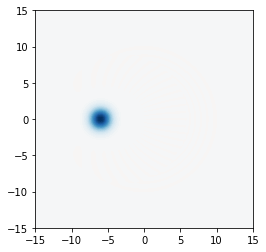

In [100]:
W = state.wigner(mode=0, xvec=xvec, pvec=xvec)
plt.axes().set_aspect("equal")
plt.contourf(xvec, xvec, W, 60, cmap=cm.RdBu, norm=nrm)
plt.show()

In [81]:
bos_eng = sf.Engine("bosonic", backend_options={"hbar": hbar})
bos_state = eng.run(prog).state

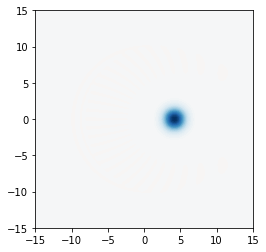

In [82]:
Wps = bos_state.wigner(mode=0, xvec=xvec, pvec=xvec)
plt.axes().set_aspect("equal")
plt.contourf(xvec, xvec, Wps, 60, cmap=cm.RdBu, norm=nrm)
plt.show()

In [2]:
from typing import Tuple, List

In [131]:
def run_circuit(alpha: float = 0, beta: float = 0) -> Tuple[List[List[float]], float]:
    nmodes = 1
    cutoff = 30
    # alpha = 0.5
    # beta = -4
    prog = sf.Program(nmodes)

    with prog.context as q:
        Vac | q
        sf.ops.Dgate(alpha) | q
        sf.ops.Dgate(beta) | q
        sf.ops.MeasureFock() | q

    fock_eng = sf.Engine("fock", backend_options={"cutoff_dim": cutoff})
    result = fock_eng.run(prog)
    # print (result.state.mean_photon([0]))
    # return (result.samples, result.state.fock_prob([0]))
    return f'alpha:{np.round(alpha, 2)}, probability:{result.state.fock_prob([0])} and samples: {result.samples}'
    

In [132]:
run_circuit()

'alpha:0, probability:1.0 and samples: [[0]]'

In [136]:
[run_circuit(alpha=beta) for beta in np.arange(0, 1.1, 0.1)]

['alpha:0.0, probability:1.0 and samples: [[0]]',
 'alpha:0.1, probability:0.9999999999999998 and samples: [[0]]',
 'alpha:0.2, probability:0.9999999999999998 and samples: [[0]]',
 'alpha:0.3, probability:0.9999999999999998 and samples: [[0]]',
 'alpha:0.4, probability:1.0 and samples: [[0]]',
 'alpha:0.5, probability:1.0 and samples: [[0]]',
 'alpha:0.6, probability:0.9999999999999998 and samples: [[2]]',
 'alpha:0.7, probability:1.0 and samples: [[0]]',
 'alpha:0.8, probability:1.0 and samples: [[3]]',
 'alpha:0.9, probability:0.9999999999999998 and samples: [[2]]',
 'alpha:1.0, probability:1.0 and samples: [[1]]']

In [ ]:
    def single_layer(self, eng: sf.Engine) -> Result:
        """ Creates a single mode quantum "program".
            https://strawberryfields.readthedocs.io/en/stable/code/api/strawberryfields.Program.html
        """

        self._result = eng.run(prog)
        return self._result

In [14]:
prog = sf.Program(1)
with prog.context as q:
            # Phase space squeezing gate.
            # https://strawberryfields.readthedocs.io/en/stable/code/api/strawberryfields.ops.Sgate.html
            sf.ops.Dgate(0.2) | q[0]

            # Measures whether a mode contains zero or nonzero photons.
            # https://strawberryfields.readthedocs.io/en/stable/code/api/strawberryfields.ops.MeasureThreshold.html
            # sf.ops.MeasureFock() | q[0]
# Instantiate the Gaussian backend.
# https://strawberryfields.readthedocs.io/en/stable/introduction/circuits.html
eng = sf.Engine(backend='fock', backend_options={"cutoff_dim": 5})

In [15]:
result = eng.run(prog)

In [16]:
result.state.fock_prob([0])

0.9607894391523231

In [17]:
result.samples

array([], shape=(0, 0), dtype=float64)

In [18]:
eng.run_progs

In [19]:
result = eng.run(prog)

In [20]:
result.state.fock_prob([0])

0.8521437904698547

In [13]:
result.samples

array([[0]])